# Introduction
In Part V, we will use machine learning techniques to predict the num_orders. The process goes like this: 

![MachineLearningProcess](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/CommonAssets/MachineLearningProcess.png)

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
- pandas as pd

In [1]:
# Step 1: Import libraries
import pandas as pd

### Step 2: Read the CSV from Part IV
After importing the libraries, read the CSV that you exported from Part IV. 

Sanity check:

You should expect 456,548 rows with 218 columns in the DataFrame. 

In [2]:
# Step 2: Read the CSV from Part IV
df=pd.read_csv('Merged v0.3.csv')
df

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotion,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
0,1,136.83,152.29,0,0,177,2.0,24218.91,15.46,0,...,0,0,0,0,0,0,0,0,0,1
1,2,135.83,152.29,0,0,323,2.0,43873.09,16.46,0,...,0,0,0,0,0,0,0,0,0,1
2,3,132.92,133.92,0,0,96,2.0,12760.32,1.00,0,...,0,0,0,0,0,0,0,0,0,1
3,4,135.86,134.86,0,0,163,2.0,22145.18,-1.00,0,...,0,0,0,0,0,0,0,0,0,1
4,5,146.50,147.50,0,0,215,2.0,31497.50,1.00,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,583.03,630.53,0,1,13,4.5,7579.39,47.50,1,...,0,0,0,0,0,0,1,0,0,0
456544,142,581.03,582.03,0,0,42,4.5,24403.26,1.00,0,...,0,0,0,0,0,0,1,0,0,0
456545,143,583.03,581.03,0,0,40,4.5,23321.20,-2.00,0,...,0,0,0,0,0,0,1,0,0,0
456546,144,582.03,581.03,0,0,53,4.5,30847.59,-1.00,0,...,0,0,0,0,0,0,1,0,0,0


## Approach 1: Modelling the problem as a regular ML task
We'll first model this task as a regular machine learning problem. The assumption is that the purchase pattern for each week is independent of the previous week's purchase.

In this approach, the way we split the data is random. 

### Step 3: Prepare your independent and dependent variables
At this point, let's prepare our indepedent and dependent variables. 

1. Declare a variable, and assign your independent variables to it by dropping num_orders and total_revenue
2. Declare a variable, and assign only values num_orders

In [3]:
# Step 3: Prepare your independent and dependent variables
X=df.drop(['num_orders', 'total_revenue'], axis=1)
y=df['num_orders']

### Step 4: Import machine learning libraries
Time to import other libraries. We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. 

Import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. DummyRegressor - sklearn.dummy
3. LinearRegression - sklearn.linear_model
4. DecisionTreeRegressor - sklearn.tree
5. RandomForestRegressor - sklearn.ensemble
6. GradientBoostingRegressor - sklearn.ensemble
6. mean_squared_error - sklearn.metrics
7. numpy as np
8. matplotlib.pyplot as plt

In [4]:
# Step 4: Import the machine learning libraries
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error 
import numpy as np
import matplotlib.pyplot as plt

### Step 5: Split your dataset into train and test
Now that you have finished importing the libraries you need, split the dataset into train and test at a 80/20 split.

In [5]:
# Step 5: Split your dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

MSE: 400.4531164347009


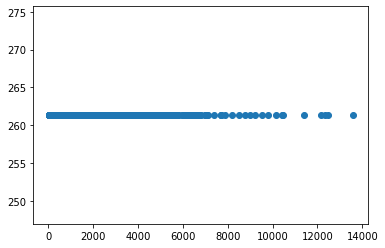

In [6]:
# Step 6a: Declare a variable to store the model
dummy_regr = DummyRegressor()
# Step 6b: Fit your train dataset
dummy_regr.fit(X_train, y_train)
# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
dummy_regr_pred=dummy_regr.predict(X_test)
# Step 6d: Print the square root of the mean_squared_error between the y test and dummy prediction
print("MSE:", mean_squared_error(y_test, dummy_regr_pred, squared=False))
# Step 6e: Plot a scatter plot between y_test and your prediction
plt.scatter(y_test, dummy_regr_pred)
plt.show()

### Step 7: Train a LinearRegression
Take note of the DummyRegressor's RMSE that we printed in 6d - that will be our baseline.

We'll start off with a LinearRegression. Same thing as you did with Step 6. 

Additional, plot a straight like where y = x.

MSE: 287.92859128181254


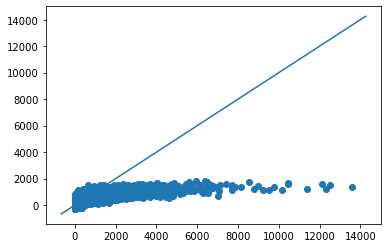

In [7]:
# Step 7a: Declare a variable to store the LinearRegression model
LR=LinearRegression()
# Step 7b: Fit your train dataset
LR.fit(X_train, y_train)
# Step 7c: Declare a variable and store your predictions that you make with your model using X test data
LR_pred=LR.predict(X_test)
# Step 7d: Print the square root of the mean_squared_error between the y test and linear regression prediction
print("MSE:", mean_squared_error(y_test, LR_pred, squared=False))
# Step 7e: Plot a scatter plot between y_test and your prediction
plt.scatter(y_test, LR_pred)
plt.plot(plt.xlim(), plt.xlim())
plt.show()

### Step 8: Train a DecisionTreeRegressor
Unsurprisingly, LinearRegression doesn't do too well but it's a good start.

Next, you know the drill - let's try a tree-based regressor the DecisionTreeRegressor. Keep an eye on the eventual RMSE.

<strong>From here onwards, the training time may take a while so be patient while the model trains.</strong>

MSE: 191.9064009532467


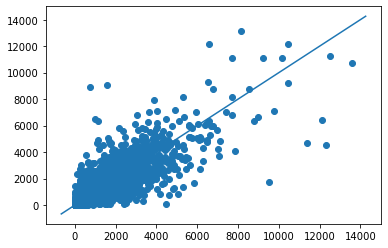

In [8]:
# Step 8: Train and assess a DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
DTR_pred=DTR.predict(X_test)
print("MSE:", mean_squared_error(y_test, DTR_pred, squared=False))
plt.scatter(y_test, DTR_pred)
plt.plot(plt.xlim(), plt.xlim())
plt.show()

### Step 9: Train a RandomForestRegressor
Let's train a Random Forest regressor next. 

Don't forget to print the RMSE and plot the prediction vs actual values.

MSE: 144.96907432293733


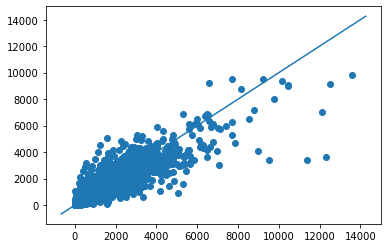

In [9]:
# Step 9: Train a RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR_pred=RFR.predict(X_test)
print("MSE:", mean_squared_error(y_test, RFR_pred, squared=False))
plt.scatter(y_test, RFR_pred)
plt.plot(plt.xlim(), plt.xlim())
plt.show()

### Step 10: Train other regressors
We have used two of the most popular regressors around, but feel free to try other models as well. 

The idea is to mix them up and see which one does best.

In [10]:
# Step 10: Train another regressor

### Step 11: Create a DataFrame with the feature importances of your best model
After training a few models (we hope you did), time to determine the importance of all the features used in your modelling.

Get your model's feature importances, and create a DataFrame. Don't forget to sort, so you can see the top few features used in modelling.

You're looking for something like this:

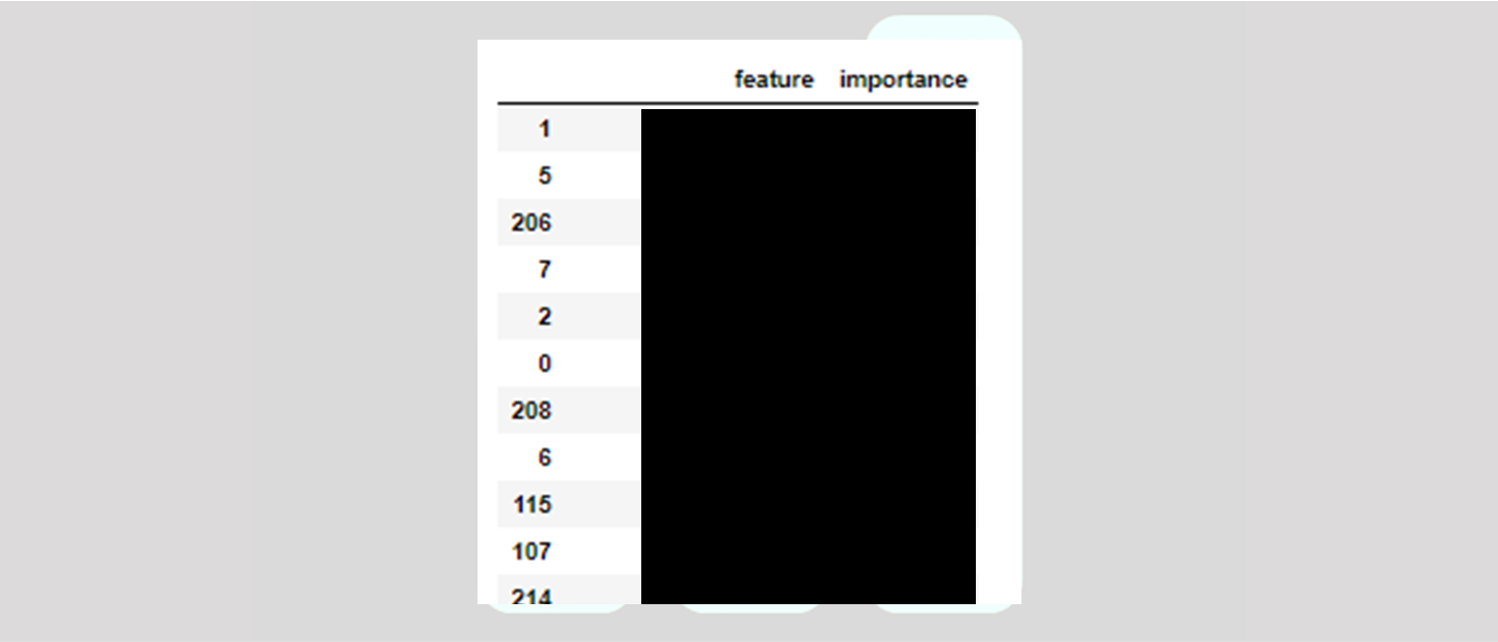

What are the top features for your model, and what can you infer from it?

In [48]:
RFR.feature_importances_

rfr_FI=RFR.feature_importances_
pd.DataFrame({'feature': X_train.columns, 'importance':rfr_FI}).sort_values(by='importance', ascending=False)

,feature,importance
1,checkout_price,0.110784
5,op_area,0.103826
7,has_promotion,0.093956
2,base_price,0.080421
206,Rice Bowl,0.078467
...,...,...
113,meal_id_2126,0.000007
114,meal_id_2139,0.000006
91,meal_id_1247,0.000004
108,meal_id_1902,0.000003


In [11]:
# Step 11: Create a DataFrame with feature importances
from sklearn.feature_selection import SelectKBest, f_regression
fs=SelectKBest(score_func=f_regression, k="all")
fs.fit(X_train, y_train)
pd.DataFrame({'feature': X_train.columns, 'importance':fs.scores_}).sort_values(by='importance', ascending=False)

,feature,importance
7,has_promotion,35435.826522
4,homepage_featured,32813.326575
1,checkout_price,29633.428984
3,emailer_for_promotion,28294.564462
206,Rice Bowl,24074.680320
...,...,...
64,center_id_109,0.559611
156,city_code_599,0.559611
182,city_code_699,0.342871
162,city_code_620,0.233388


## Approach 2: Modelling the problem as a time-series
As mentioned in the notebook earlier, we were modelling the dataset as a normal ML task. However, there is a chronological element to the dataset, i.e. week. 

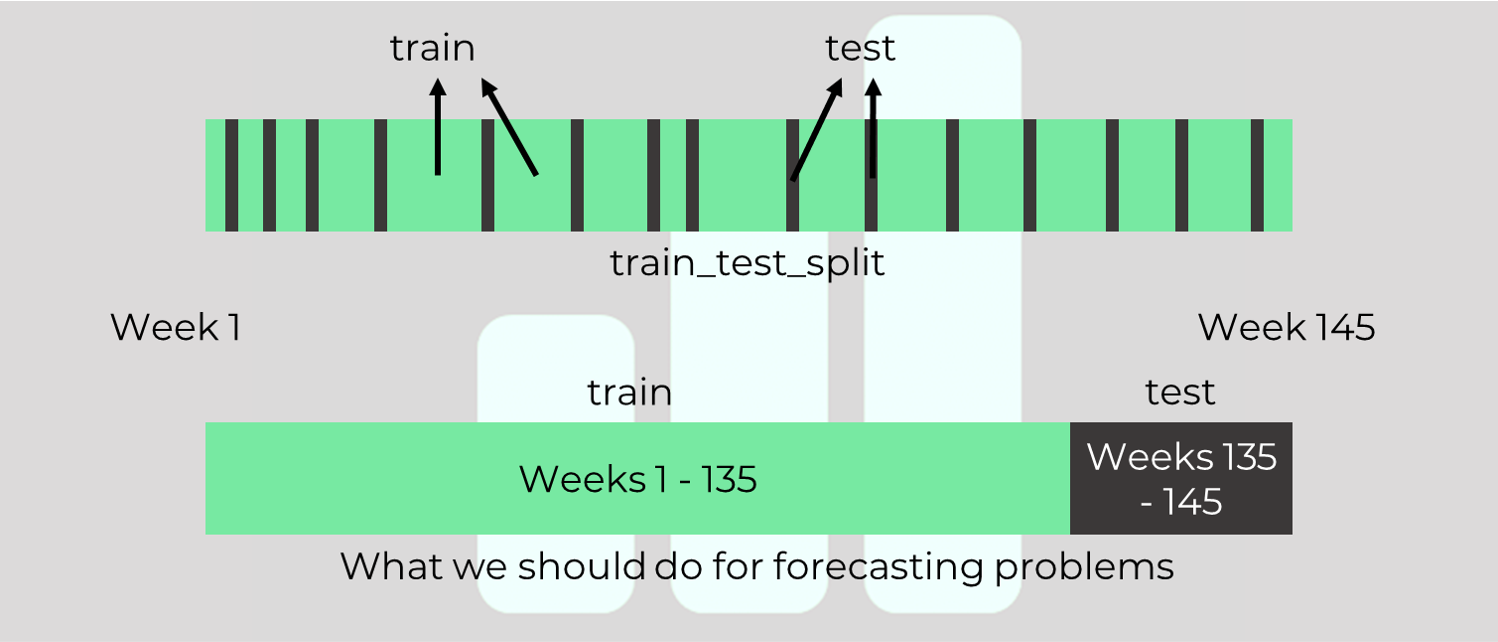

As such, we will split our data differently - we take any dataset from week 1 to 135 as our train dataset, and week 136 to 145 as our test dataset.

### Step 12: Filter your data to have Week 1 - 135 for train
Filter your original DataFrame from Step 2 to have only Weeks 1-135 and assign it to a variable.

You should end up with: 
- 423,727 rows
- 218 columns

<details>
    <summary>Click here once for a hint to find how to filter for a range.</summary>
    <div><strong>Google "filter dataframe by range of values"</strong></div>
</details>

In [43]:
# Step 12: Get DataFrame containing Week 1-135
X_1_135=df[df['week'].between(1,135)]
X_1_135

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotion,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
0,1,136.83,152.29,0,0,177,2.0,24218.91,15.46,0,...,0,0,0,0,0,0,0,0,0,1
1,2,135.83,152.29,0,0,323,2.0,43873.09,16.46,0,...,0,0,0,0,0,0,0,0,0,1
2,3,132.92,133.92,0,0,96,2.0,12760.32,1.00,0,...,0,0,0,0,0,0,0,0,0,1
3,4,135.86,134.86,0,0,163,2.0,22145.18,-1.00,0,...,0,0,0,0,0,0,0,0,0,1
4,5,146.50,147.50,0,0,215,2.0,31497.50,1.00,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456533,131,445.29,630.53,0,1,270,4.5,120228.30,185.24,1,...,0,0,0,0,0,0,1,0,0,0
456534,132,435.53,630.53,0,1,339,4.5,147644.67,195.00,1,...,0,0,0,0,0,0,1,0,0,0
456535,133,601.43,630.53,0,1,107,4.5,64353.01,29.10,1,...,0,0,0,0,0,0,1,0,0,0
456536,134,600.43,631.53,0,1,41,4.5,24617.63,31.10,1,...,0,0,0,0,0,0,1,0,0,0


### Step 13: Filter your data to have Week 136 - 145 for test
Filter your original DataFrame from Step 2 to have only Weeks 136 to 145 and assign it to another variable.

You should end up with: 
- 32,821 rows
- 218 columns

In [44]:
# Step 13: Get DataFrame containing Week 136-145
X__136_145=df[df['week'].between(136,145)]
X__136_145

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotion,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
135,136,148.44,148.44,0,0,134,2.0,19890.96,0.0,0,...,0,0,0,0,0,0,0,0,0,1
136,137,153.29,154.29,0,0,96,2.0,14715.84,1.0,0,...,0,0,0,0,0,0,0,0,0,1
137,138,155.23,156.23,0,0,81,2.0,12573.63,1.0,0,...,0,0,0,0,0,0,0,0,0,1
138,139,150.35,152.35,0,0,67,2.0,10073.45,2.0,0,...,0,0,0,0,0,0,0,0,0,1
139,140,151.35,150.35,0,0,204,2.0,30875.40,-1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,583.03,630.53,0,1,13,4.5,7579.39,47.5,1,...,0,0,0,0,0,0,1,0,0,0
456544,142,581.03,582.03,0,0,42,4.5,24403.26,1.0,0,...,0,0,0,0,0,0,1,0,0,0
456545,143,583.03,581.03,0,0,40,4.5,23321.20,-2.0,0,...,0,0,0,0,0,0,1,0,0,0
456546,144,582.03,581.03,0,0,53,4.5,30847.59,-1.0,0,...,0,0,0,0,0,0,1,0,0,0


### Step 14: Prepare train and test dataset 
Similar to Step 3, we will prepare the train and test for training and testing.
1. Train (X) - drop num_orders and total_revenue from Step 12 DataFrame
2. Train (y) - get the num_orders from Step 12 DataFrame
3. Test (X) - drop num_orders and total_revenue from Step 13 DataFrame
4. Test (y) - get the num_orders from Step 13 DataFrame

We are doing these extra steps because the order in the DataFrame is not entirely chronological, i.e. you have rows that do not have "week" in consecutive order.

We <em>could</em> have sorted the DataFrame before this, but this approach is fine too.

In [45]:
# Step 14: Prepare train and test dataset
X_train1=X_1_135.drop(['num_orders', 'total_revenue'], axis=1)
y_train1=X_1_135['num_orders']
X_test1=X__136_145.drop(['num_orders', 'total_revenue'], axis=1)
y_test1=X__136_145['num_orders']

### Step 15: Train a LinearRegression
We can jump straight to modelling with a LinearRegression. 

MSE: 191.66977462322637


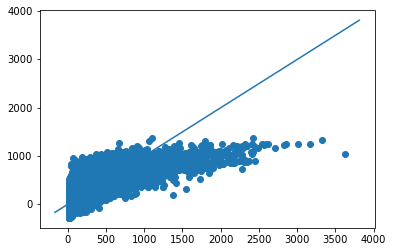

In [46]:
# Step 15: Train a LinearRegression

LR1=LinearRegression()
LR1.fit(X_train1, y_train1)
LR_pred1=LR1.predict(X_test1)
print("MSE:", mean_squared_error(y_test1, LR_pred1, squared=False))
plt.scatter(y_test1, LR_pred1)
plt.plot(plt.xlim(), plt.xlim())
plt.show()

### Step 16: Train a few other models
You might realize that LinearRegression doesn't quite cut it, especially for this round. 

Keep going and try a few models and assess their performance.

MSE: 130.70014457996538


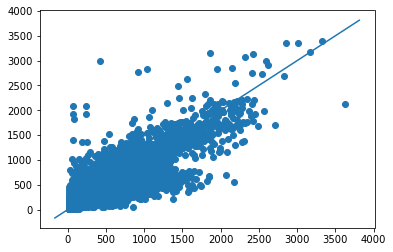

In [49]:
# Step 16: Try your favorite models
RFR1 = RandomForestRegressor()
RFR1.fit(X_train1, y_train1)
RFR_pred1=RFR1.predict(X_test1)
print("MSE:", mean_squared_error(y_test1, RFR_pred1, squared=False))
plt.scatter(y_test1, RFR_pred1)
plt.plot(plt.xlim(), plt.xlim())
plt.show()

### Step 17: Construct a DataFrame with feature importances
Create a DataFrame with your model's feature importances with your best performing model.

Compare this DataFrame with the one that you got from Step 11.

What are the things that you see in both DataFrames?

In [50]:
# Step 17: Create a DataFrame with feature importances from your best performing model

rfr_FI1=RFR1.feature_importances_
pd.DataFrame({'feature': X_train.columns, 'importance':rfr_FI1}).sort_values(by='importance', ascending=False)

,feature,importance
1,checkout_price,0.122507
5,op_area,0.104116
206,Rice Bowl,0.101922
7,has_promotion,0.096778
2,base_price,0.079739
...,...,...
114,meal_id_2139,0.000007
121,meal_id_2492,0.000007
91,meal_id_1247,0.000004
108,meal_id_1902,0.000002


## Assessing model performance in predicting aggregated num_orders
Depending on how you see it, the model you trained may or may not be as satisfying as you think. Previously, we've only trained and predicted for individual orders. 

What if we combined all of our num_orders predictions together into a week-level aggregate? 

### Step 18: Create a new column 'prediction' with your model prediction
Next up, let's plot our predictions again the actual num_orders in Week 136 - 145.

Before that, let's create a new column called 'prediction' in the DataFrame you got from Step 13.

To check, at the end you'll have:
1. 32,821 rows
2. 219 columns

In [51]:
# Step 18: Add predicton to the DataFrame from Step 13

X__136_145['prediction']=RFR_pred1
X__136_145

<ipython-input-51-3fc2a2905ca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X__136_145['prediction']=RFR_pred1


,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotion,...,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai,prediction
135,136,148.44,148.44,0,0,134,2.0,19890.96,0.0,0,...,0,0,0,0,0,0,0,0,1,171.36
136,137,153.29,154.29,0,0,96,2.0,14715.84,1.0,0,...,0,0,0,0,0,0,0,0,1,124.25
137,138,155.23,156.23,0,0,81,2.0,12573.63,1.0,0,...,0,0,0,0,0,0,0,0,1,124.25
138,139,150.35,152.35,0,0,67,2.0,10073.45,2.0,0,...,0,0,0,0,0,0,0,0,1,154.78
139,140,151.35,150.35,0,0,204,2.0,30875.40,-1.0,0,...,0,0,0,0,0,0,0,0,1,161.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,583.03,630.53,0,1,13,4.5,7579.39,47.5,1,...,0,0,0,0,0,1,0,0,0,136.65
456544,142,581.03,582.03,0,0,42,4.5,24403.26,1.0,0,...,0,0,0,0,0,1,0,0,0,42.22
456545,143,583.03,581.03,0,0,40,4.5,23321.20,-2.0,0,...,0,0,0,0,0,1,0,0,0,24.95
456546,144,582.03,581.03,0,0,53,4.5,30847.59,-1.0,0,...,0,0,0,0,0,1,0,0,0,32.85


### Step 19: Perform a groupby operation by week on DataFrame from Step 18
Now that we've added a new column, let's perform a groupby operation by week, and sum up num_orders and prediction.

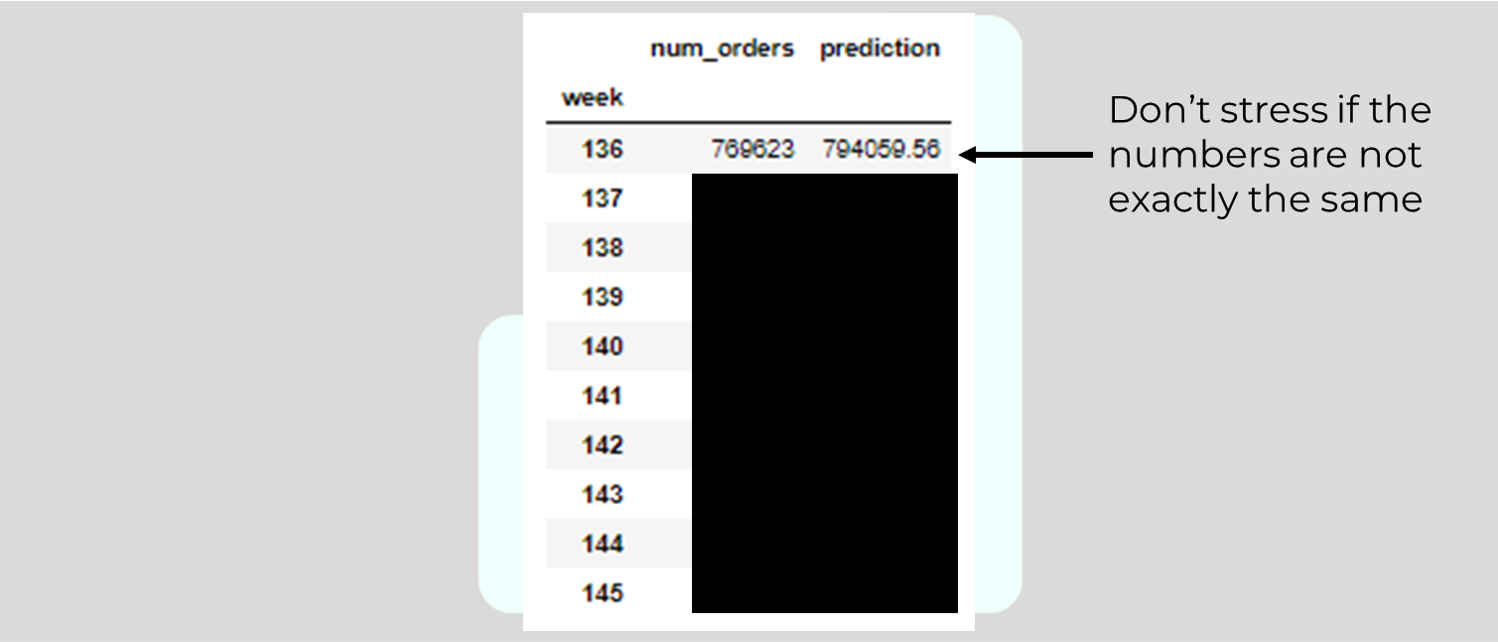

This will give us a DataFrame that contains:
1. 10 rows
2. 2 columns

Don't fret if you don't get the exact same numbers for prediction.

In [58]:
# Step 19: Perform a groupby operation by week for Step 18 DataFrame, and sum up num_orders and prediction
wk136=X__136_145.groupby('week').agg({"num_orders": sum, "prediction":sum})
wk136

,num_orders,prediction
week,,
136,769623,793338.29
137,719740,759955.79
138,667343,722920.41
139,751935,739729.34
140,802689,760182.88
141,776240,726436.21
142,739661,726033.80
143,759926,719352.44
144,801197,812898.78


### Step 20: Perform a groupby operation by week on DataFrame from Step 12
Let's perform a groupby operation by week on the DataFrame that we got from Step 12, and just sum up 'num_orders'.

You'll have a DataFrame that has:
1. 135 rows
2. 1 column

In [59]:
# Step 20: Perform a groupby operation by week for Step 12 DataFrame, and sum up num_orders
wk1=X_1_135.groupby('week').agg({"num_orders": sum})
wk1

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
131,899953
132,939374
133,835583


### Step 21: Plot train, test, and prediction
Final test of the prediction - plotting them together and visually inspecting it.

In the same plot, plot:
1. summed num_orders (from Step 20 DataFrame)
2. summed num_orders (from Step 19 DataFrame)
3. summed predictions (from Step 19 DataFrame)

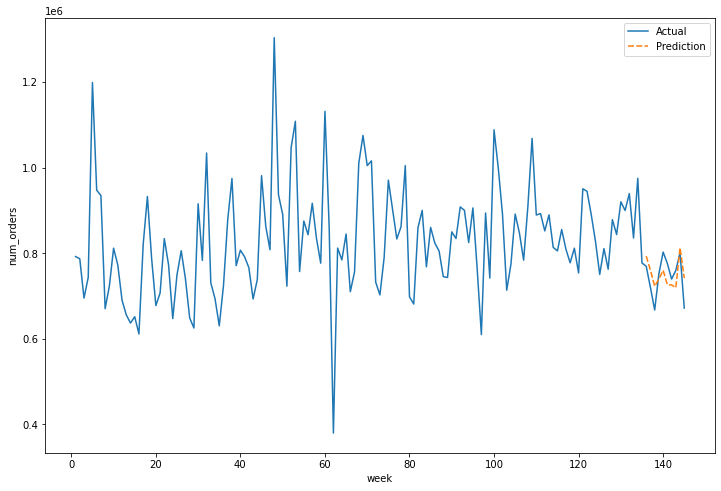

In [83]:
# Step 21: Plot your time-series data
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=wk1.append(wk136))
plt.legend(['Actual','Prediction'])
ax.set(ylabel="num_orders")
plt.show()

<details>
    <summary>What'd you think? Did the model perform well on an aggregate level?</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/NumOrdersTimeSeries.png"></div>
    <div><strong>Looks like the model does well on the aggregate level, and the weekly predictions look fine.</strong></div>
</details>

# The end
You did it! You've arrived at the end. Congratulations and well done on completing this project series! 

Let's review.
1. In Part I, you collected the datasets and combined them to form a single DataFrame
2. In Part II, you performed exploratory data analysis on the dataset, investigating distributions and relationships found between features 
3. In Part III, you explored the dataset even further to ask pertinent business-centric questions 
4. In Part IV, you engineered features from the dataset in preparation for model building
5. In Part V, you trained a machine learning model that can predict number of orders placed each week. In addition, you modelled the problem as a time-series as well

That's a lot of work done.

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG